Name: Dyani Peterson

Course Number: MSBD 566

Date: September 15, 2025

Honor Statement: I pledge my honor that I have neither given nor received any unauthorized aid on this assignment. I have read and understand both the policy and the instructions described in the given assignment.

Name: Dyani Peterson

Date: September 18, 2025

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:
Pollen Count 0.0 to 2.4 Pollen Level
Low
2.5 to 4.8 Low – Medium
4.9 to 7.2 Medium
7.3 to 9.6 Medium – High
9.7 to 12.0 High

**Question 1**

Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
a. How many times has the AQI been recorded above 120?
b. When did the Air Quality Index Category become unhealthy?

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Load the dataset
df = pd.read_csv('Air_Quality_and_Pollen_Count.csv')

In [ ]:
# Convert Date column to datetime
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'])

In [ ]:
# Sort by date
df = df.sort_values(by='ReportDateTime')

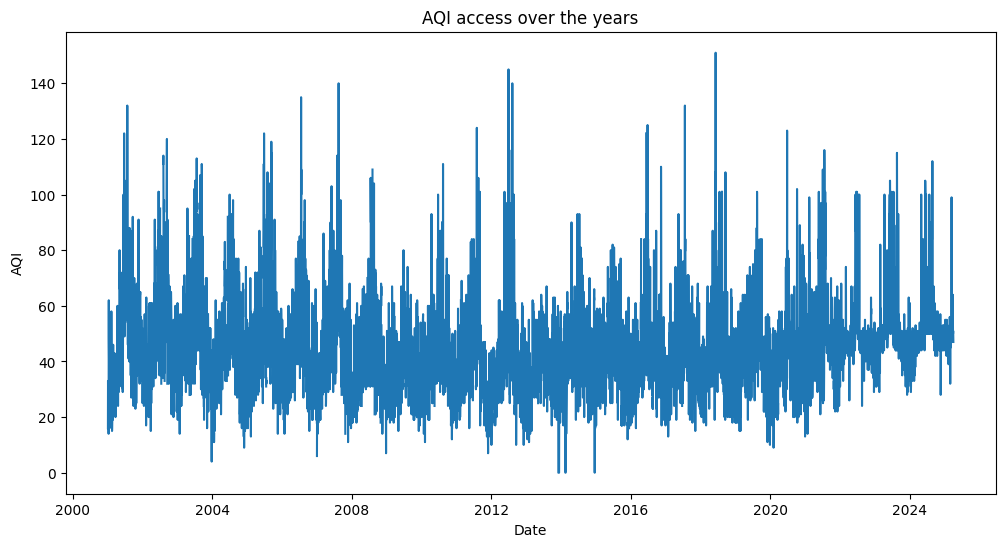

In [ ]:
# Plot 1: AQI across the years
plt.figure(figsize=(12,6))
plt.plot(df['ReportDateTime'], df['AQI'])
plt.title('AQI access over the years')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

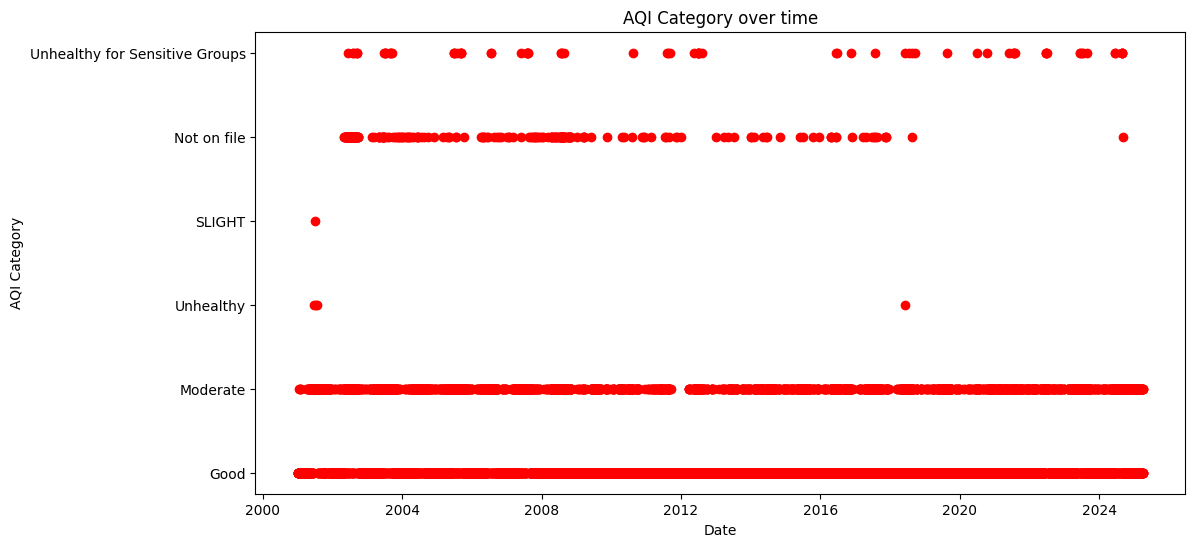

In [ ]:
# Plot 2: AQI Category over time
plt.figure(figsize=(12,6))
plt.scatter(df['ReportDateTime'], df['Category'], c = 'red')
plt.title('AQI Category over time')
plt.xlabel('Date')
plt.ylabel('AQI Category')
plt.show()

In [ ]:
# Part A: Count how many times AQI > 120
above_120 = (df['AQI'] > 120).sum()
print(f"Number of times AQI > 120: {above_120}")

Number of times AQI > 120: 14


In [ ]:
# Part B: When did category become 'Unhealthy'?
unhealthy_dates = df[df['Category'].str.contains('Unhealthy', case=False, na=False)]
print("Dates when category became 'Unhealthy':")
print(unhealthy_dates['ReportDateTime'])

Dates when category became 'Unhealthy':
8800   2001-06-21 05:00:00+00:00
8786   2001-07-12 05:00:00+00:00
8778   2001-07-24 05:00:00+00:00
8531   2002-06-17 05:00:00+00:00
8479   2002-08-05 05:00:00+00:00
                  ...           
294    2024-06-14 05:00:00+00:00
220    2024-08-26 05:00:00+00:00
219    2024-08-27 05:00:00+00:00
218    2024-08-28 05:00:00+00:00
217    2024-08-29 05:00:00+00:00
Name: ReportDateTime, Length: 80, dtype: datetime64[ns, UTC]


Number of times AQI > 120: 14

The first 'Unhealthy' date is 06/21/2001

**Question 2**: Which pollen type occurs the most?

In [ ]:
# If each row is one observation with a pollen type, just count occurrences:
pollen_counts = df['PollenType'].value_counts()
print("Pollen counts by type:")
print(pollen_counts)

Pollen counts by type:
PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Poplar          1
Ash             1
Hackberry       1
Goldenrod       1
Name: count, dtype: int64


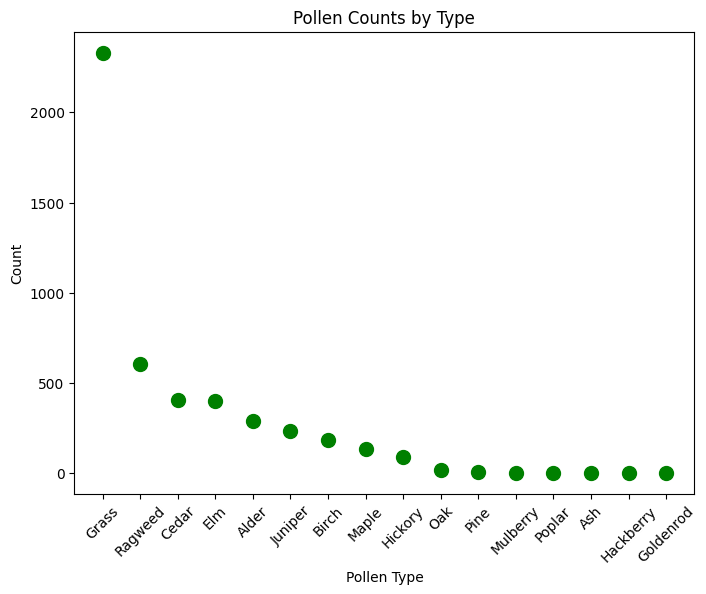

In [ ]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(pollen_counts.index, pollen_counts.values, s=100, color='green')
plt.title('Pollen Counts by Type')
plt.xlabel('Pollen Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The Ragweed pollen type occurs the most.

**Question 3**:

[Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?

Based on the air quality and pollen, Nashville is moderately comfortable overall but may be uncomfortable during certain seasons. This is due to high pollen levels and occasional poor air quality.

**Question 4**:

Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table). For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.

In [ ]:
# import time module
import time

In [ ]:
# Drop columns
df = df[['Category', 'AQI']].dropna()

In [ ]:
# Vectorized (groupby)
time_start = time.time()
vec_result = (
    df.groupby('Category', as_index=False)['AQI']
    .mean()
    .rename(columns={'AQI':'mean_AQI'})
    .sort_values('Category', kind='stable')
    .reset_index(drop=True)
)
time_end = time.time()
vec_time = time_end - time_start

print(vec_result)
print(f"Vectorized time: {vec_time:.6f}")

                         Category    mean_AQI
0                            Good   36.966283
1                        Moderate   62.240840
2                          SLIGHT   60.000000
3                       Unhealthy  127.500000
4  Unhealthy for Sensitive Groups  110.078947
Vectorized time: 0.003283


In [ ]:
# Manual (for-loop)
time_start = time.time()
sums = {}
counts = {}
for cat, aqi in zip(df['Category'].values, df['AQI'].values):
  if cat not in sums:
    sums[cat] = 0
    counts[cat] = 0
  sums[cat] += float(aqi)
  counts[cat] += 1

man_result = (
    pd.DataFrame(
        {
            'Category': list(sums.keys()),
            'mean_AQI':[sums[c]/counts[c] for c in sums.keys()]}
    )
    .sort_values('Category', kind='stable')
   .reset_index(drop=True)
)
time_end = time.time()
man_time = time_end - time_start

print(man_result)
print(f"Manual time: {man_time:.6f}")

                         Category    mean_AQI
0                            Good   36.966283
1                        Moderate   62.240840
2                          SLIGHT   60.000000
3                       Unhealthy  127.500000
4  Unhealthy for Sensitive Groups  110.078947
Manual time: 0.005511


In [ ]:
# Compare methods
print(f"Speedup (manual / vectorized): {man_time/vec_time:.2f}")

Speedup (manual / vectorized): 1.68


The vectorized groupby().mean() method ran about 1.7 times faster than the manual loop.